In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
import librosa
import librosa.display

In [2]:
audio_files = [os.path.join("C:\\Users\\Dhruv Gandhi\\Desktop\\Dhruv Gandhi\\B. Sc\\CSM302\\Dataset", file) for file in os.listdir("C:\\Users\\Dhruv Gandhi\\Desktop\\Dhruv Gandhi\\B. Sc\\CSM302\\Dataset") if file.endswith(".wav")]

In [3]:
file = audio_files[0]

In [4]:
signal, sample_rate = librosa.load(file, sr=22050)

In [5]:
sample_rate

22050

In [7]:
print(f"signal: {signal}")
print(f"shape signal: {signal.shape}")

signal: [0. 0. 0. ... 0. 0. 0.]
shape signal: (14289,)


Text(0.5, 1.0, 'Waveform')

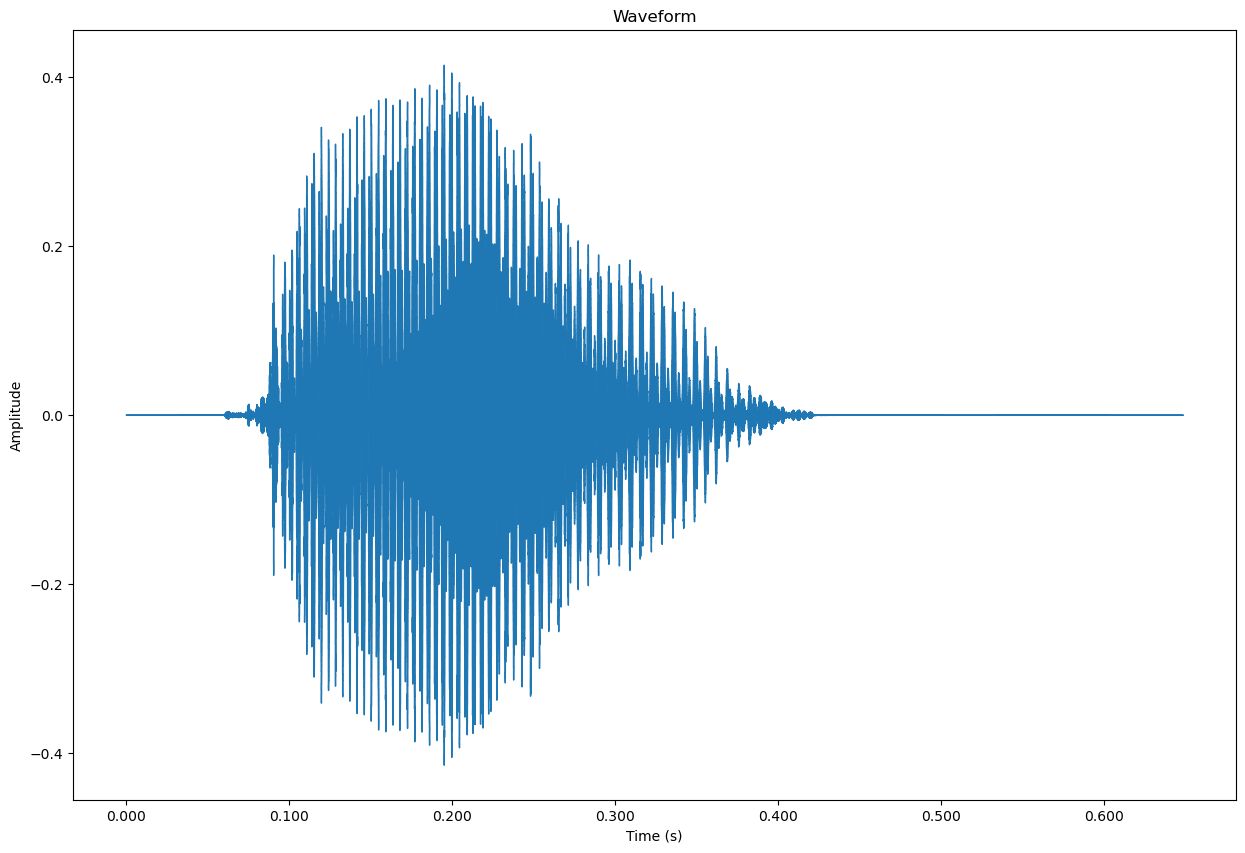

In [8]:
# WAVEFORM
plt.figure(figsize = (15,10))
librosa.display.waveshow(signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [9]:
# perform Fourier transform
fft = np.fft.fft(signal)

In [10]:
# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)

In [11]:
# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

In [12]:
# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

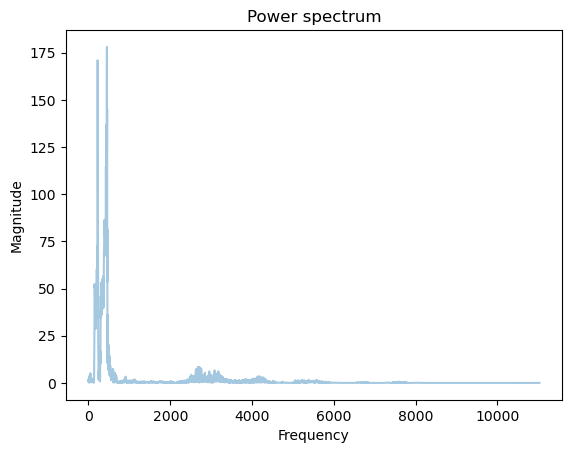

In [21]:
# plot spectrum
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")
plt.show()

In [15]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

In [16]:
# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

In [17]:
print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


In [18]:
# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [19]:
# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

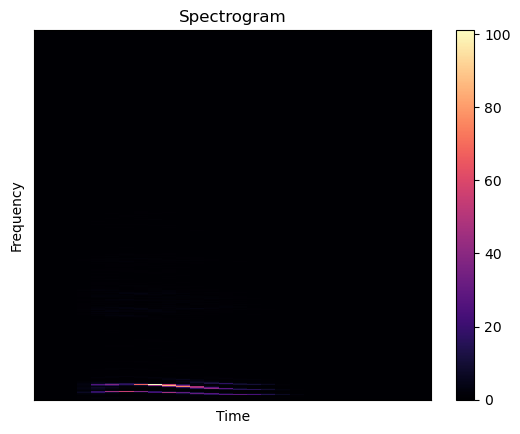

In [26]:
# display spectrogram
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")
plt.show()

In [27]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

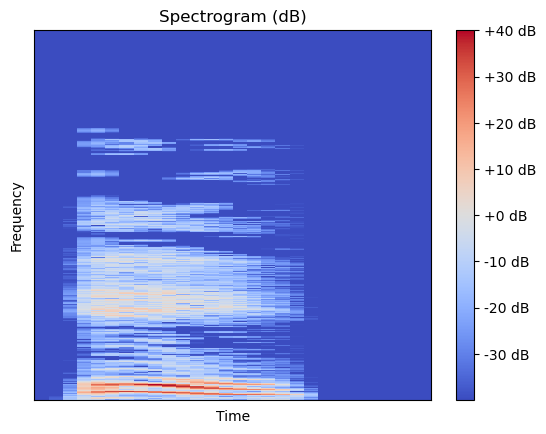

In [28]:
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.show()

In [29]:
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

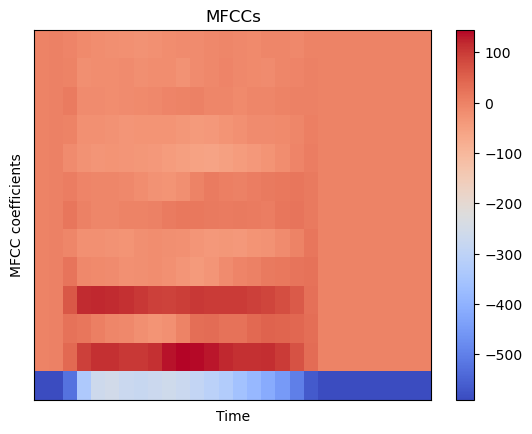

In [30]:
# display MFCCs
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.show()